In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.preprocessing import image
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [ ]:

import cv2
import numpy as np

# Function to apply Gaussian Blur
def apply_gaussian_blur(image):
    return cv2.GaussianBlur(image, (5, 5), 0)

# Function to apply Sobel filters for edge detection
def apply_sobel_filters(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
    sobel_combined = cv2.magnitude(sobel_x, sobel_y)
    return np.uint8(sobel_combined)

# Function to apply Canny Edge Detection
def apply_canny_edge(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 100, 200)
    return edges

# Example of preprocessing an image before feeding it to the model
def preprocess_image(image_path):
    image = cv2.imread(image_path)
    blurred_image = apply_gaussian_blur(image)
    sobel_image = apply_sobel_filters(blurred_image)
    canny_image = apply_canny_edge(sobel_image)
    return canny_image

# Load an example image and apply the filters
example_image_path = 'path_to_example_image.jpg'  # Replace with actual path
processed_image = preprocess_image(example_image_path)

# Display the processed image
import matplotlib.pyplot as plt

plt.imshow(processed_image, cmap='gray')
plt.title('Processed Image with Edge Detection')
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Define the image directory (the folder where your images are stored)
image_directory = '/content/drive/MyDrive/Research'

# Create a list of categories (subdirectories)
categories = os.listdir(image_directory)

# Create empty lists to store image data and labels
X = []
y = []

# Load and preprocess images from categorized subdirectories
for category in categories:
    category_path = os.path.join(image_directory, category)
    image_files = os.listdir(category_path)
    for img_file in image_files:
        img_path = os.path.join(category_path, img_file)
        img = image.load_img(img_path, target_size=(48, 48), color_mode='rgb') # Load RGB images
        img = image.img_to_array(img)
        img /= 255.0
        X.append(img)
        y.append(category)

# Convert labels to numerical values
labels = pd.get_dummies(y)

X = np.array(X)
y = labels.values

# Split data into train and validation sets
X, y = shuffle(X, y, random_state=42)  # Shuffle the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(categories)

['High-low defects', 'non-defect', 'Open Seam']


In [ ]:
# Define your model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 3)))  # Updated input shape to (48, 48, 3)
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(y.shape[1], activation='softmax'))  # Output layer with the number of categories

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
batch_size = 32
epochs = 100

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs,
                    verbose=1, validation_data=(X_val, y_val))

# Save the model
model.save('model_defects.h5')

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 16s 380ms/step - accuracy: 0.5112 - loss: 1.0889 - val_accuracy: 0.5479 - val_loss: 0.9970
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5730 - loss: 0.9151 - val_accuracy: 0.7397 - val_loss: 0.7328
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8244 - loss: 0.4734 - val_accuracy: 0.8904 - val_loss: 0.3864
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9151 - loss: 0.2851 - val_accuracy: 0.8904 - val_loss: 0.2917
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9282 - loss: 0.2378 - val_accuracy: 0.9315 - val_loss: 0.2042
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9538 - loss: 0.1932 - val_accuracy: 0.9658 - val_loss: 0.1644
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9650 - loss: 0.1047 - val_accuracy: 0.9521 - val_loss: 0.2607
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9695 - loss: 0.1311 - val_accuracy: 0.9589 - val

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 708ms/step


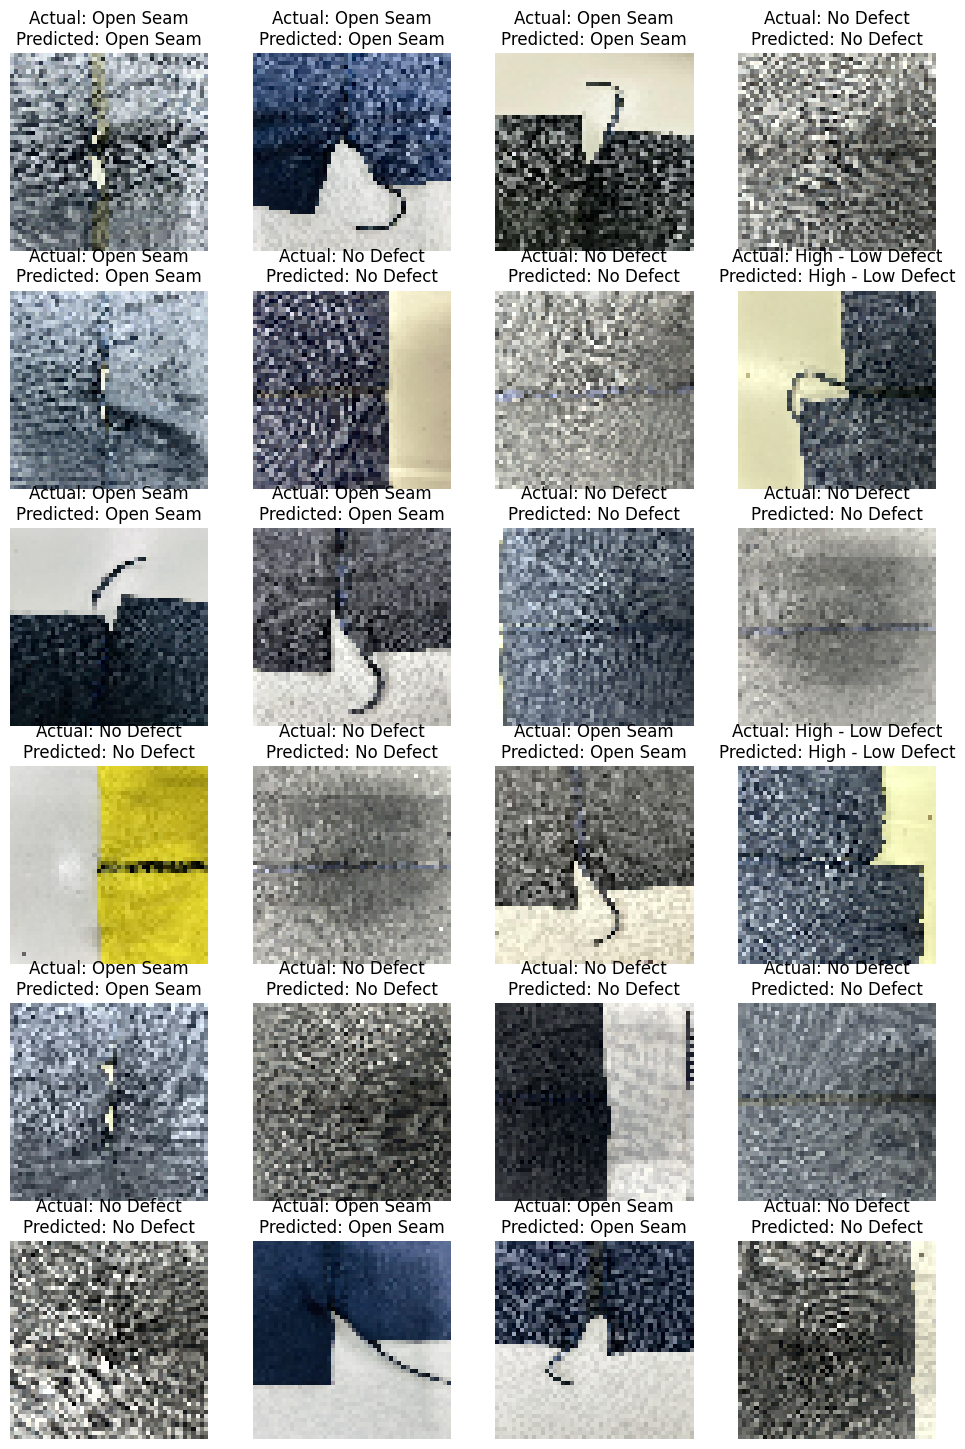

In [ ]:


import matplotlib.pyplot as plt
import random
import numpy as np

# Data visualize
sample_size = 24
num_cols = 4
num_rows = sample_size // num_cols


random_indices = random.sample(range(len(X_val)), sample_size)
sample_images = X_val[random_indices]
sample_labels_actual = y_val[random_indices]
sample_labels_predicted = model.predict(sample_images)

# Classes
class_names = ["High - Low Defect","Open Seam","No Defect"]

plt.figure(figsize=(12, 18))
for i in range(sample_size):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(sample_images[i].reshape(48, 48, 3), cmap="gray")
    actual_class_index = np.argmax(sample_labels_actual[i])
    predicted_class_index = np.argmax(sample_labels_predicted[i])
    plt.title(f"Actual: {class_names[actual_class_index]}\nPredicted: {class_names[predicted_class_index]}")
    plt.axis('off')

plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
y_pred = model.predict(X_val)
accuracy = accuracy_score(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1)) * 100
print(f"Accuracy: {accuracy:.2f}%")

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step
Accuracy: 97.95%


In [ ]:
from google.colab import files
from keras.preprocessing import image
import numpy as np

# Upload an image file
uploaded = files.upload()

# Choose the uploaded image for prediction
for filename in uploaded.keys():
    img_path = filename
    img = image.load_img(img_path, target_size=(48, 48))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize the image data

    # Use the model for prediction
    result = model.predict(img_array)
    predicted_class_index = np.argmax(result)
    predicted_class = class_names[predicted_class_index]

    print(f"Predicted class: {predicted_class}")
